In [2]:
import pandas as pd 
import numpy as np
from skimage import io, color, filters, feature
import matplotlib.pyplot as plt


In [222]:
import seaborn as sns

In [200]:
df=pd.read_csv('data/age_gender.csv')

In [201]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [75]:
type(df['pixels'][0])

str

In [80]:
df['pixels'][0][0:10]

'129 128 12'

In [81]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [152]:
X = np.array(df['pixels'].tolist())

## Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48)

In [156]:
X.shape

(23705, 48, 48)

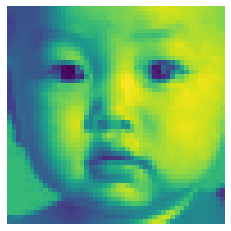

In [157]:
plt.imshow(X[2].reshape(48,48))
plt.axis('off')
plt.show()

In [251]:
df['gender_str']=df['gender'].map({1:'Female',0:'Male'})
df['ethnicity_str']=df['ethnicity'].map({0:'White',1:'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'})

In [160]:
np.random.randint(0, len(X), 1)[0]

14069

In [202]:
np.array(df['age'])

array([ 1,  1,  1, ..., 99, 99, 99])

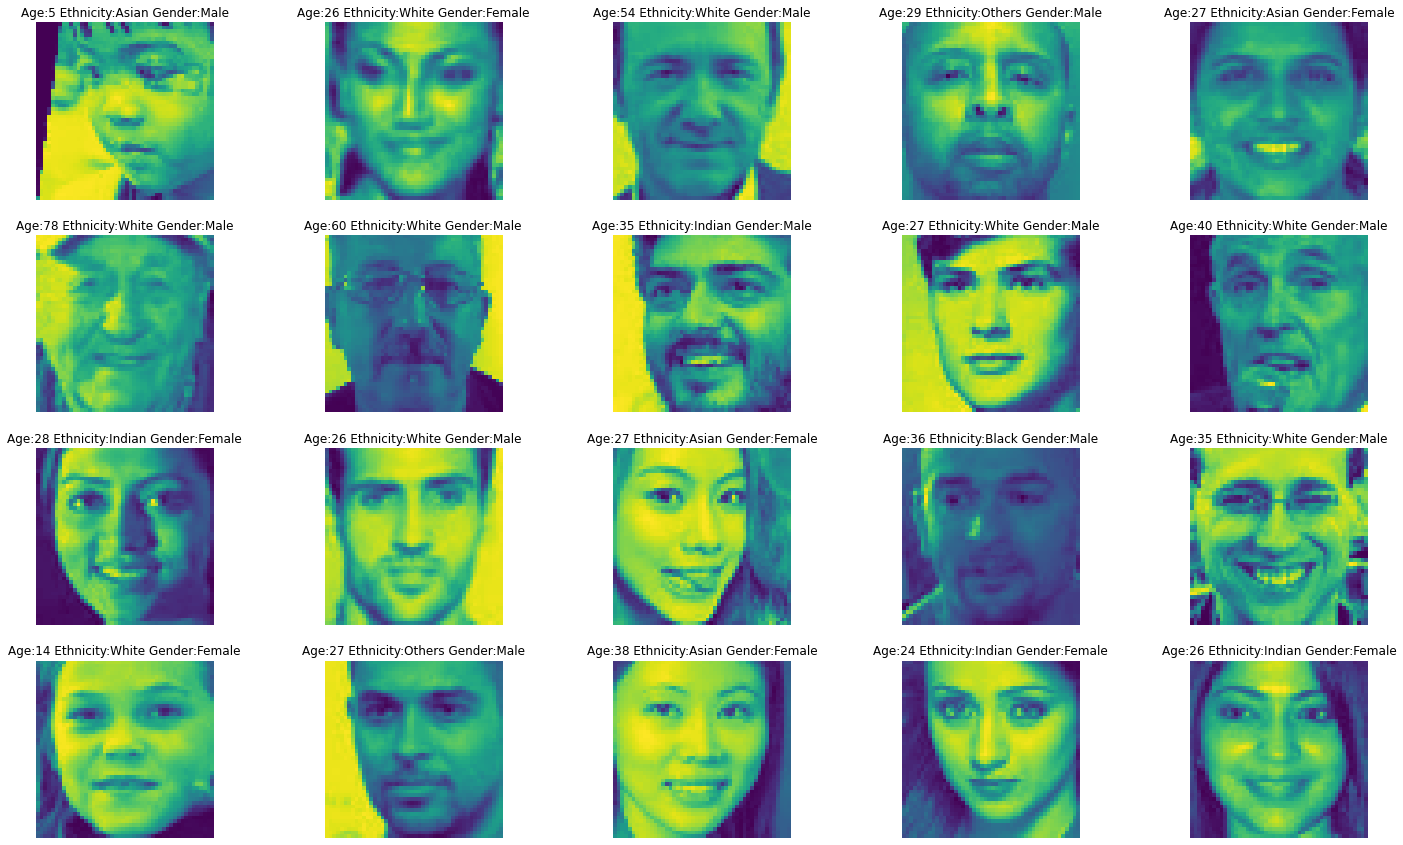

In [284]:
fig, axes = plt.subplots(4,5, figsize=(25,15))
# rand_number=np.random.randint(0, len(X), 20)
for ax in axes.flat:
    i=np.random.randint(0, len(X), 1)
    ax.imshow(X[i][0])
    ax.set_title(
 "Age:"+str(np.array(df['age'])[i][0])+" Ethnicity:"+str(np.array(df['ethnicity_str'])[i][0])+" Gender:"+str(np.array(df['gender_str'])[i][0])    )
    ax.axis('off')
plt.show()

In [217]:
#ethnicity is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

In [166]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
103       1
111       1
Name: age, Length: 104, dtype: int64

# EDA

## __Age__

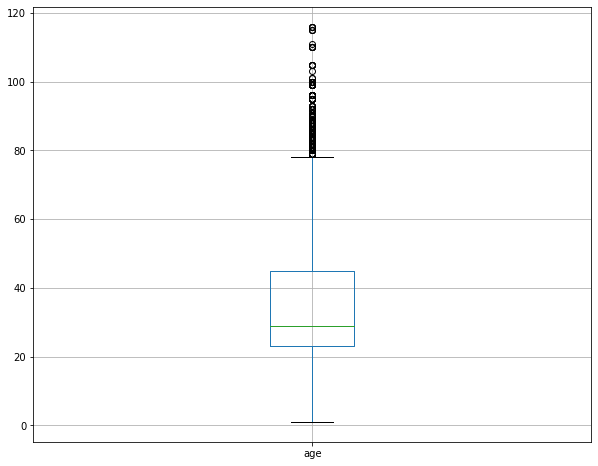

In [274]:
df[['age']].boxplot(figsize=(10,8));

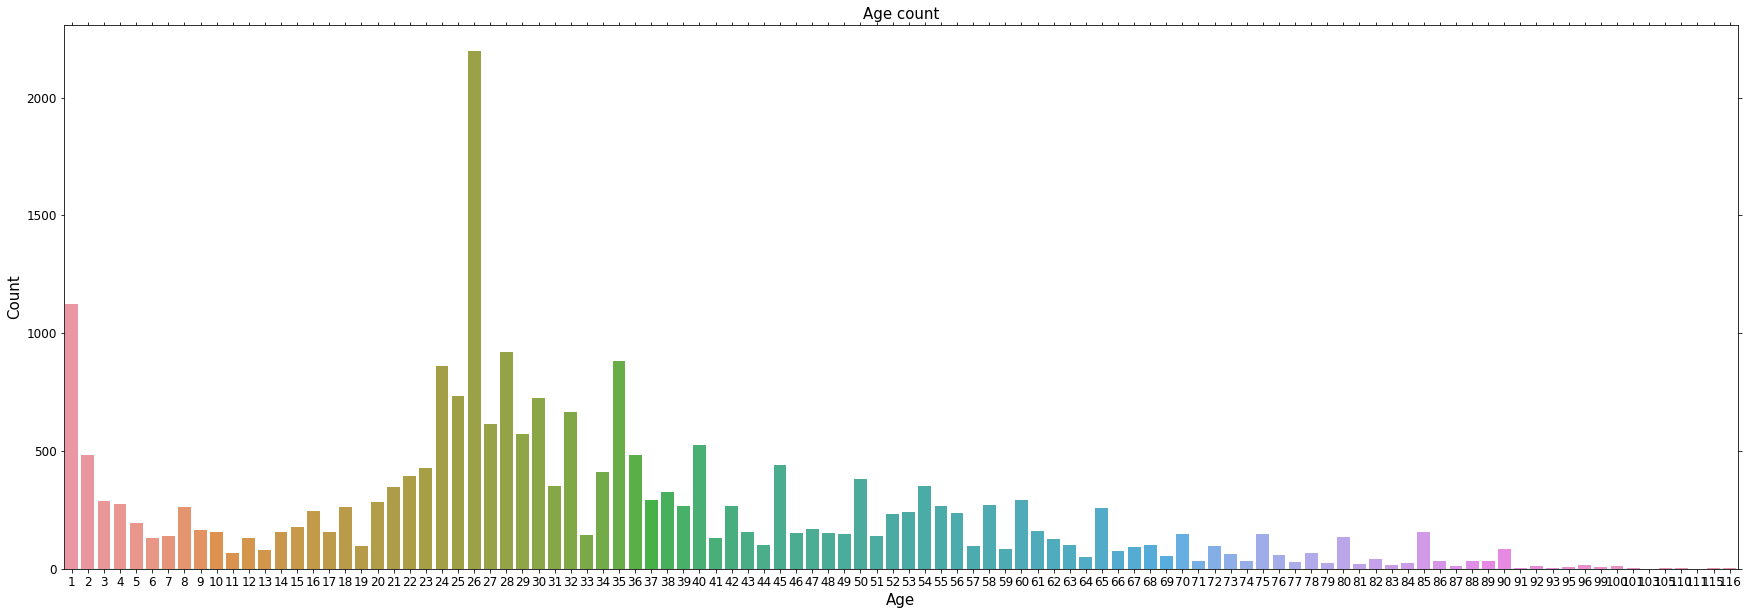

In [282]:
plt.figure(figsize=(30,10))
ax=sns.countplot(df['age'])
ax.set_title("Age count", size=15)
ax.set_xlabel("Age", size=15)
ax.set_ylabel("Count", size=15)
ax.tick_params(labelsize=12, reset= True)

## __Gender__

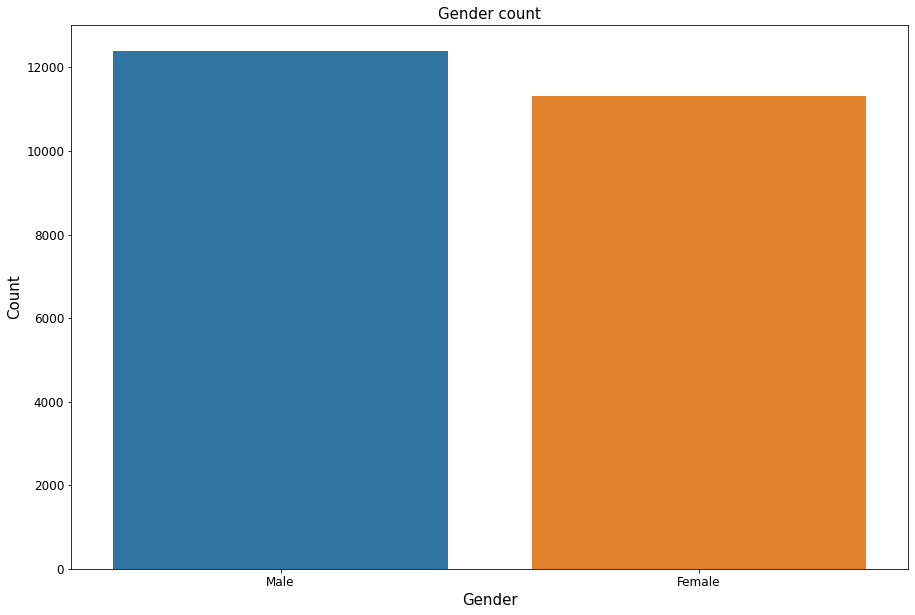

In [272]:
plt.figure(figsize=(15,10))
ax=sns.countplot(df['gender_str'])
ax.set_title("Gender count", size=15)
ax.set_xlabel("Gender", size=15)
ax.set_ylabel("Count", size=15)
ax.tick_params(labelsize=12);

## __Ethnicity__

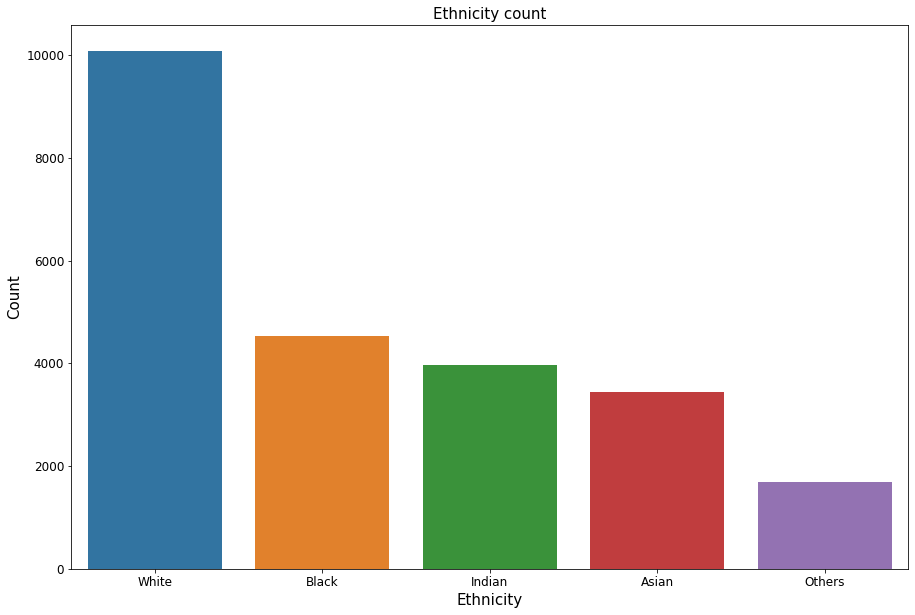

In [271]:
plt.figure(figsize=(15,10))
ax=sns.countplot(df['ethnicity_str'], order=df['ethnicity_str'].value_counts().index)
ax.set_title("Ethnicity count", size=15)
ax.set_xlabel("Ethnicity", size=15)
ax.set_ylabel("Count", size=15)
ax.tick_params(labelsize=12);

In [219]:
X.shape

(23705, 48, 48)

In [223]:
y_gender=np.array(df.gender)
y_gender.shape
y_ethnicity=np.array(df.ethnicity)
y_ethnicity.shape

(23705,)

In [242]:
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...
